The Olivetti Faces Dataset is a popular image dataset used in machine learning, especially for face recognition and dimensionality reduction tasks like PCA.

Source: AT&T Laboratories Cambridge.

Total images: 400 grayscale images.

Subjects: 40 individuals (10 images per person).

Image size: 64×64 pixels (flattened to 4096 features).

Use cases:

Face recognition

PCA (Principal Component Analysis)

Feature extraction

Clustering & classification

The dataset is often used to visualize high-dimensional data and test face classification algorithms.

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score


Load and preprocess dataset

In [77]:
# Load the Olivetti dataset
faces = fetch_olivetti_faces()
X, y = faces.data, faces.target  # X shape: (400, 4096), y shape: (400,)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


PCA

Original shape: (320, 4096)
Reduced shape: (320, 100)


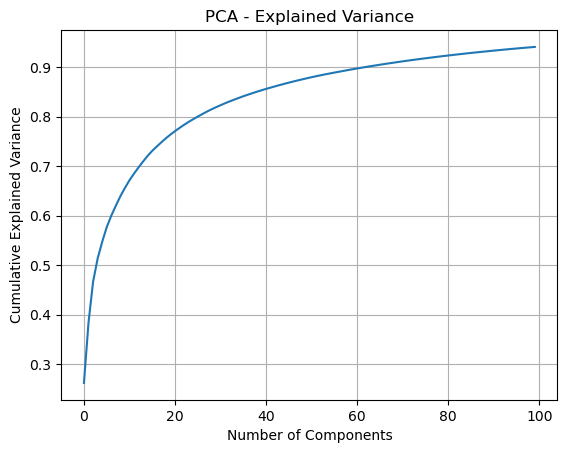

In [78]:
# Reduce to 100 components
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Original shape:", X_train_scaled.shape)
print("Reduced shape:", X_train_pca.shape)

# Explained variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance")
plt.grid()
plt.show()


K-NN

In [79]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_pca, y_train)
y_pred_knn = knn.predict(X_test_pca)

print("k-NN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


k-NN Accuracy: 0.8625
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       0.60      0.75      0.67         4
           4       0.50      1.00      0.67         3
           5       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         6
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      0.67      0.80         3
          12       0.50      0.50      0.50         2
          13       1.00      1.00      1.00         1
          14       0.60      1.00      0.75         3
          15       1.00      1.00      1.00         2
          17       0.75      1.00      0.86         3
          18       1.00      1.00      1.00         1
     

c:\Users\bened\anaconda3\envs\ml_lab_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bened\anaconda3\envs\ml_lab_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bened\anaconda3\envs\ml_lab_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

Naïve Bayes

In [80]:
nb = GaussianNB()
nb.fit(X_train_pca, y_train)
y_pred_nb = nb.predict(X_test_pca)

print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naïve Bayes Accuracy: 0.875
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       1.00      1.00      1.00         1
           2       0.50      0.50      0.50         2
           3       1.00      1.00      1.00         4
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       0.00      0.00      0.00         0
           7       1.00      0.67      0.80         6
           8       1.00      1.00      1.00         2
           9       0.40      1.00      0.57         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         3
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         3
          15       1.00      0.50      0.67         2
          16       0.00      0.00      0.00         0

c:\Users\bened\anaconda3\envs\ml_lab_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bened\anaconda3\envs\ml_lab_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bened\anaconda3\envs\ml_lab_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ID3 Algorithm (Decision Tree Classifier)

In [81]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(X_train_pca, y_train)
y_pred_dt = dt.predict(X_test_pca)

print("Decision Tree (ID3) Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))




Decision Tree (ID3) Accuracy: 0.425
              precision    recall  f1-score   support

           0       0.17      0.33      0.22         3
           1       1.00      1.00      1.00         1
           2       0.14      0.50      0.22         2
           3       0.50      0.25      0.33         4
           4       0.50      0.33      0.40         3
           5       0.50      0.67      0.57         3
           6       0.00      0.00      0.00         0
           7       1.00      0.17      0.29         6
           8       0.50      0.50      0.50         2
           9       0.00      0.00      0.00         2
          10       0.50      0.50      0.50         2
          11       0.00      0.00      0.00         3
          12       0.33      0.50      0.40         2
          13       1.00      1.00      1.00         1
          14       1.00      0.33      0.50         3
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00  

c:\Users\bened\anaconda3\envs\ml_lab_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bened\anaconda3\envs\ml_lab_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bened\anaconda3\envs\ml_lab_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Cross-validation

In [82]:
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Combine train and test back (since cross-validation handles splits)
X_scaled = scaler.fit_transform(X)
X_pca_full = pca.fit_transform(X_scaled)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []

for train_idx, test_idx in skf.split(X_pca_full, y):
    X_train_fold, X_test_fold = X_pca_full[train_idx], X_pca_full[test_idx]
    y_train_fold, y_test_fold = y[train_idx], y[test_idx]

    model = GaussianNB()
    model.fit(X_train_fold, y_train_fold)
    y_pred_fold = model.predict(X_test_fold)

    acc = accuracy_score(y_test_fold, y_pred_fold)
    accuracies.append(acc)
    print(f"Fold Accuracy: {acc:.4f}")

print(f"\nAverage Accuracy: {np.mean(accuracies):.4f}")


Fold Accuracy: 0.8875
Fold Accuracy: 0.8125
Fold Accuracy: 0.8750
Fold Accuracy: 0.8875
Fold Accuracy: 0.8125

Average Accuracy: 0.8550


PCA visualization

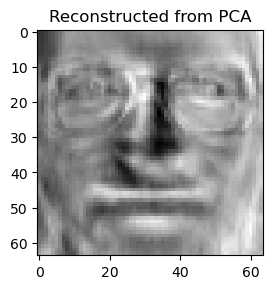

In [83]:
plt.subplot(1, 2, 2)
plt.imshow(pca.inverse_transform(X_train_pca[102]).reshape(64, 64), cmap='gray')
plt.title("Reconstructed from PCA")
plt.show()

Visualize faces

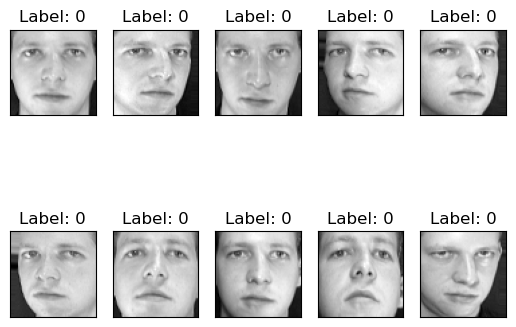

In [84]:
def plot_faces(images, labels, n_row=2, n_col=5):
    
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.title(f"Label: {labels[i]}")
        plt.xticks(())
        plt.yticks(())
    plt.show()

plot_faces(faces.images, y)
